<a href="https://colab.research.google.com/github/nirumano/nirusanmanoharan/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Import Dataset**

In [ ]:
#Loading the data from csv file to a Pandas Dataframe
customer_data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
# Verify data has been sucesfully loaded from the first 5 rows of the data frame
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Data Analysis**

In [ ]:
# Dimension, total number of rows and columns
customer_data.shape
# sample size is good as it is 200 customers

(200, 5)

In [ ]:
# Gather information about the customer dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Check for null/missing values - result clean data source
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Selecing Annual Income & Spending Score from Dataset**

In [ ]:
X = customer_data.iloc[:,[3,4]].values

In [ ]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

**Choosing Optimal Number of Clusters**

In [ ]:
# Using Cluster Sum of Squares method to find number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

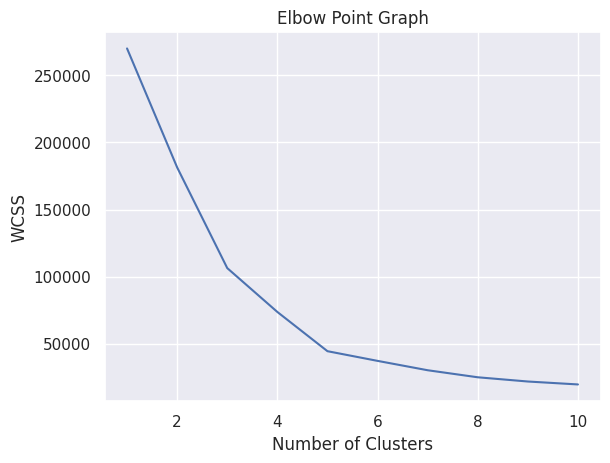

In [ ]:
# Plat an elbow graph to analyze data

sns.set()
plt.plot(range(1,11), wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

**Optimal Number of Clusters = 5**

In [ ]:
#Given the Elbow Point Graph, the optimal point would be 5 clusters since this is the last step before a significant change in slope.

#Training the k-means clustering model


kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Data Visualization**

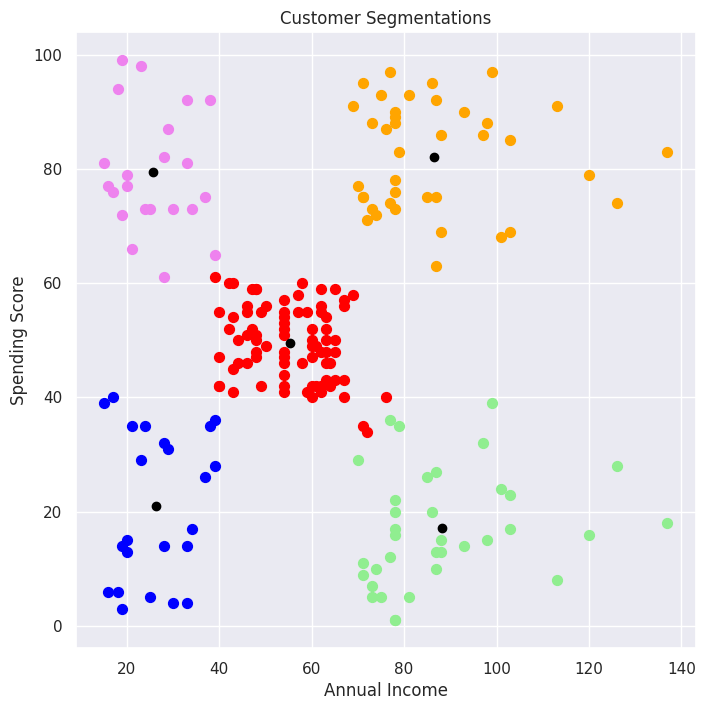

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1], s=50, c="lightgreen", label="Cluster 1")
plt.scatter(X[Y==1,0],X[Y==1,1], s=50, c="red", label="Cluster 2")
plt.scatter(X[Y==2,0],X[Y==2,1], s=50, c="orange", label="Cluster 3")
plt.scatter(X[Y==3,0],X[Y==3,1], s=50, c="violet", label="Cluster 4")
plt.scatter(X[Y==4,0],X[Y==4,1], s=50, c="blue", label="Cluster 5")


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="black", label="Centroids")

plt.title("Customer Segmentations")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

**Insights, Strategies & Conclusion**


---



**Insights:**

**Cluster Analysis:**
*   Cluster 1 (Red): Moderate income (around $40,000-$70,000) and moderate spending scores (around 40-60). This is the largest cluster, indicating that many customers fall into this category.
*   Cluster 2 (Blue): Low income (around $20,000-$40,000) and low spending scores (0-20). These customers are less affluent and spend less.
*   Cluster 3 (Green): High income (around $70,000-$120,000) but low spending scores (0-40). These customers have high purchasing power but are not spending much.
*   Cluster 4 (Purple): Low income (around $20,000-$40,000) but high spending scores (60-100). These customers are enthusiastic shoppers despite their lower income.
*   Cluster 5 (Orange): High income (around $60,000-$140,000) and high spending scores (60-100). These are affluent and high-spending customers, though it's a smaller group.

**Strategies:**

**Targeted Marketing:**
*   Red Cluster: These customers are your average shoppers. Regular promotions, loyalty programs, and seasonal sales could be effective in maintaining their engagement.
*   Blue Cluster: These customers may be more price-sensitive. Discount stores, budget-friendly brands, and promotional offers could attract and retain them.
*   Green Cluster: High-income but low-spending customers need incentives to increase their spending. Premium services, personalized shopping experiences, and exclusive events could entice them to spend more.
*   Purple Cluster: Despite lower incomes, these customers have high spending scores. Offering them value-for-money products, rewards for frequent purchases, and layaway programs could help maintain their loyalty.
*   Orange Cluster: These are your high-value customers. Exclusive deals, VIP programs, personalized services, and luxury brands should be targeted to this segment.



**Product Placement and Store Layout:**
*   Position luxury and high-end stores in areas frequented by the Orange and Green clusters.
*   Budget-friendly and discount stores should be easily accessible to the Blue and Purple clusters.
*   Mixed-use areas with a variety of stores can cater to the Red cluster effectively.



**Customer Experience:**
*   Red and Purple Clusters: Create engaging and interactive shopping experiences, such as pop-up shops, live demonstrations, and in-mall events.
*   Green and Orange Clusters: Offer concierge services, personal shopping assistants, and exclusive lounges to enhance their shopping experience.




**Data-Driven Promotions:**
*   Utilize purchase history and spending patterns to create personalized marketing campaigns.
*   Use digital channels (email, SMS, app notifications) to target specific clusters with relevant offers and promotions.




**Feedback and Improvement:**
*   Regularly gather feedback from different customer segments to understand their needs and preferences.
*   Implement changes based on feedback to improve customer satisfaction and loyalty.



**Conclusion**
By leveraging these insights and strategies, the mall can enhance customer satisfaction, increase foot traffic, and boost overall sales.